In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qec import RotatedSurfaceCode

In [2]:
rsc = RotatedSurfaceCode(
    distance = 3,
    depolarize1_rate = 0.01,
    depolarize2_rate = 0.01
)

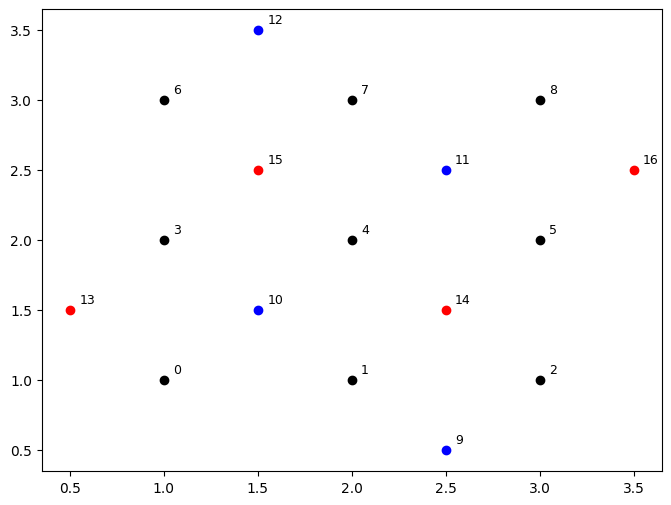

In [3]:
plt.figure(figsize=(8, 6))

for q in rsc.lattice:
    x, y = q
    if rsc.lattice[q] in rsc.x_qubits.keys():
        plt.scatter(x, y, color='blue', label="X")
    elif rsc.lattice[q] in rsc.z_qubits.keys():
        plt.scatter(x, y, color='red', label="Z")
    else:
        plt.scatter(x, y, color='black', label="data")
        
    plt.text(x + 0.05, y + 0.05, f'{rsc.lattice[q]}', fontsize=9)

plt.show()

In [4]:
rsc.build_memory_circuit(number_of_rounds=2)
rsc.memory_circuit.diagram()

q0: -R-DEPOLARIZE1(0.01)---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------@-DEPOLARIZE2(0.01)------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)----------MR:rec[16]-DETECTOR:D12=rec[19]*rec[16]*rec[12]-----------------OBSERVABLE_INCLUDE:L0*=rec[16]*rec[20]*rec[24]-
                                                                                                                                                                                                                                                                                                                                                          | |                                                         | |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | |                                                         | |
 q1: -R-DEPOLARIZE1(0.01)---------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------|-|---------------------------------------------------------|-|---------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------DEPOLARIZE1(0.01)-DEPOLARIZE1(0.01)--------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------|-|---------------------------------------------------------|-|---------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------DEPOLARIZE1(0.01)-DEPOLARIZE1(0.01)-DEPOLARIZE1(0.01)----------MR:rec[17]-DETECTOR:D13=rec[20]*rec[17]*rec[21]*rec[18]*rec[13]------------------------------------------------
                                                                                                          | |                                                         | |                                                                                                                                                                                 | |                                                         | |                                                         | |                                                             

In [7]:
num_shots = 10**4
prob_errors = np.linspace(0, 0.2, 10)

collected_stats = {}

for distance in [3, 5, 7]:
    
    temp_logical_error_rate = []
    
    for prob_error in prob_errors:
        
        rsc = RotatedSurfaceCode(
            distance = distance,
            depolarize1_rate = prob_error,
            depolarize2_rate = prob_error
        )
        rsc.build_memory_circuit(number_of_rounds=distance*3)
        num_errors_sampled = rsc.compute_logical_errors(num_shots)
        temp_logical_error_rate.append(num_errors_sampled / num_shots)
        
    collected_stats[distance] = temp_logical_error_rate

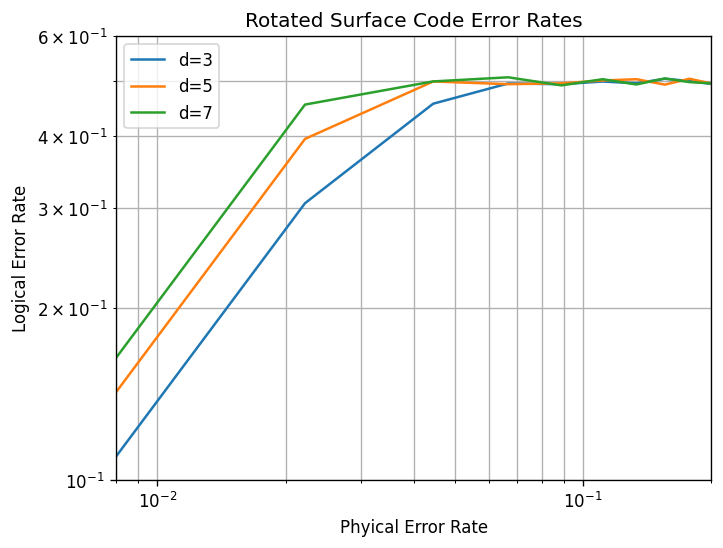

In [16]:
fig, ax = plt.subplots(1, 1)

for distance in collected_stats.keys():
    ax.plot(prob_errors, collected_stats[distance], label=f"d={distance}")
    
ax.set_ylim(1e-1, 6e-1)
ax.set_xlim(8e-3, 2e-1)
ax.loglog()
ax.set_title("Rotated Surface Code Error Rates")
ax.set_xlabel("Phyical Error Rate")
ax.set_ylabel("Logical Error Rate")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)